# Online Payment Fraud Detection using machine Learning in python

As we are approaching modernity, the trend of paying online is increasing tremendously. It is very beneficial for the buyer to pay online as it saves time, and solves the problem of free money. Also we do not need to carry cash with us. But we all know that Good things are accompained by bad things 

The online payment method leads to fraud that happen using any payment app. that is why Online payment Fraud Detectio is very Important


The dataset we will be using have these columns

1.Step - Tells about the unit of time.

2.Type - Type of transaction done.

3.Amount - The total amount of transaction.

4.Nameorg - Account that starts the transaction.

5.oldbalanceorg - Balance of the account of sender before transaction.

6.Newbalanceorg - Balance of the account of sender after transaction.

7.NameDest - Account that receives the transaction.

8.OldbalanceDest - Balance of the account of receiver before transaction.

9.Newbalancedest - Balance of the account of receiver after transaction.

10.isfraud - The value to be predicted [0 or 1].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Onlinefrauddetection.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Data Visualization
Let's count the columns with different datatypes like category, interger, float

In [9]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("categorical variables:", len(object_cols))

int = (data.dtypes == 'int')
num_cols = list(int[int].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

categorical variables: 3
Integer variables: 0
Float variables: 5


Let's see the count plot of the payment type column using seaborn library

<Axes: xlabel='type', ylabel='count'>

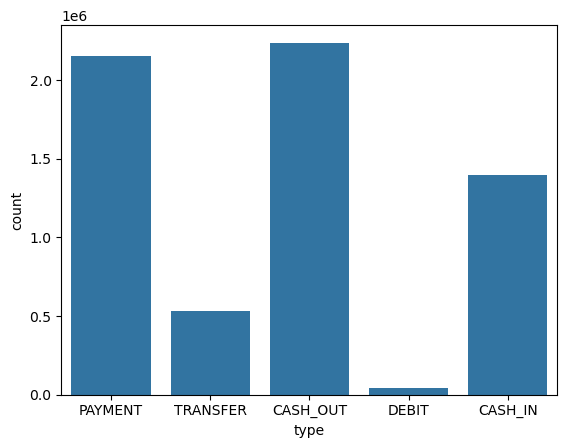

In [10]:
sns.countplot(x='type', data=data)

We can also use the bar plot for analysing "type" and "amount" column simultaneously

<Axes: xlabel='type', ylabel='amount'>

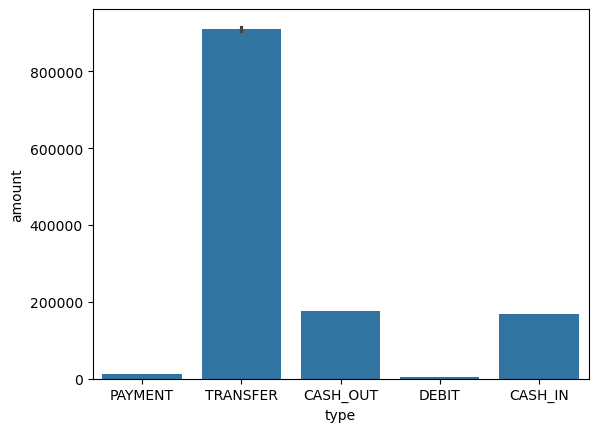

In [14]:
sns.barplot(x='type', y='amount',data=data)

In [15]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Figure size 1500x600 with 0 Axes>

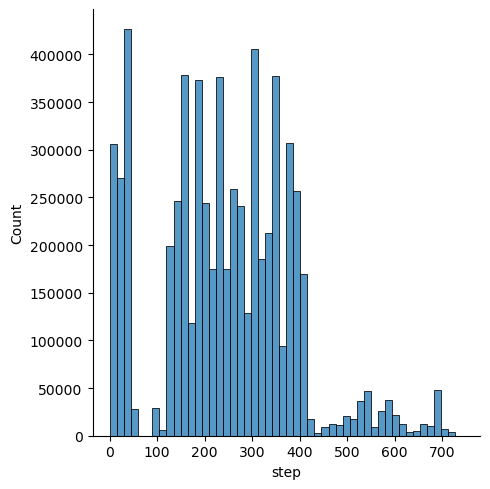

In [17]:
plt.figure(figsize=(15, 6))
sns.displot(data['step'], bins=50)

<Axes: >

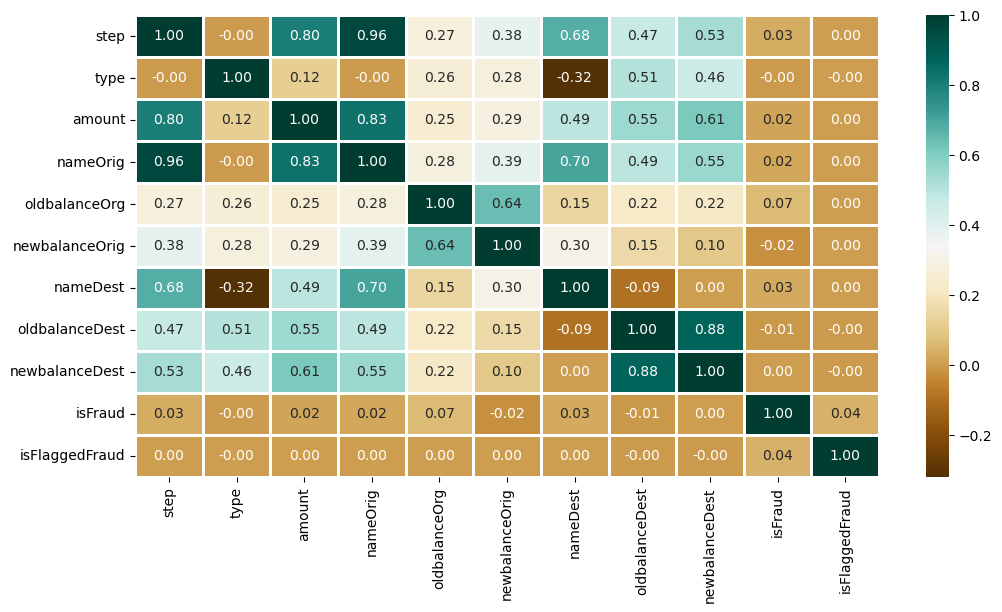

In [18]:
plt.figure(figsize =(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths=2,
            annot=True)

Data Preprocessing

In [19]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [20]:
x = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [21]:
x.shape, y.shape

((6362620, 11), (6362620,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

Let's import the modules of the relevant models

Model Training

Logistic regression: it predicts that the probability of a given data belongs to the particular category or not


XGBClassifier: it refers to Gradient Boosted Decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts result


SVC :Svc is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. then it gives the output according the most nearby element.


RandomForest:Randomforest classifier creates a set of decision tree from a randomly selected subset of the training set. then it collects the votes from different decsion trees to decide the final prediction.

In [24]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/150.0 MB 23.9 MB/s eta 0:00:07
   ---------------------------------------- 0.7/150.0 MB 9.1 MB/s eta 0:00:17
   ---------------------------------------- 1.2/150.0 MB 9.8 MB/s eta 0:00:16
   ---------------------------------------- 1.7/150.0 MB 10.1 MB/s eta 0:00:15
    --------------------------------------- 2.2/150.0 MB 10.9 MB/s eta 0:00:14
    --------------------------------------- 2.8/150.0 MB 10.4 MB/s eta 0:00:15
    --------------------------------------- 3.2/150.0 MB 10.3 MB/s eta 0:00:15
    --------------------------------------- 3.6/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 4.1/150.0 MB 10.2 MB/s eta 0:00:15
   - -------------------------------------- 4.6/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 5.1/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 5.5/150.0 MB 10.1 

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Let's Train the model

In [29]:
models = [LogisticRegression(), XGBClassifier(), RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]}:')

train_preds = models[i].predict_proba(X_train)[:, 1]
print('Training Accuracy:', ras(y_train, train_preds))

y_preds = models[i].predict_proba(X_test)[:, 1]
print('validation Accuracy:', ras(y_test, y_preds))
print()

C:\Users\yuvas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression():
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...):
RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7):
Training Accuracy: 0.9999992846155892
validation Accuracy: 0.9635718404867615



Model Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

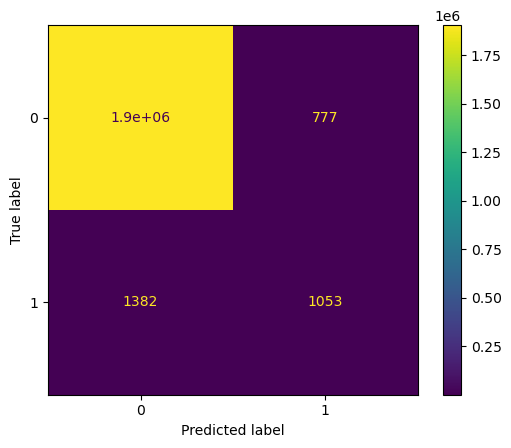

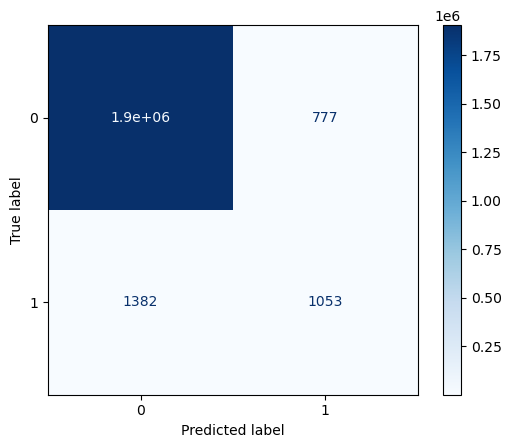

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show